In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

# Load the dataset
db = pd.read_csv('genres_v2.csv')

# View the first few rows
db.head()


<ipython-input-18-a291f8111c7e>:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [19]:
# Fill missing song names
db['song_name'] = db['song_name'].fillna(db['title'])
db['song_name'] = db['song_name'].fillna(db['Unnamed: 0'])

# Drop unnecessary columns
db = db.drop(['Unnamed: 0', 'title', 'track_href', 'analysis_url', 'uri', 'id', 'type'], axis=1)

# Drop any remaining rows with missing values
db = db.dropna()

# Check for any remaining missing values
db.isna().sum()


,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


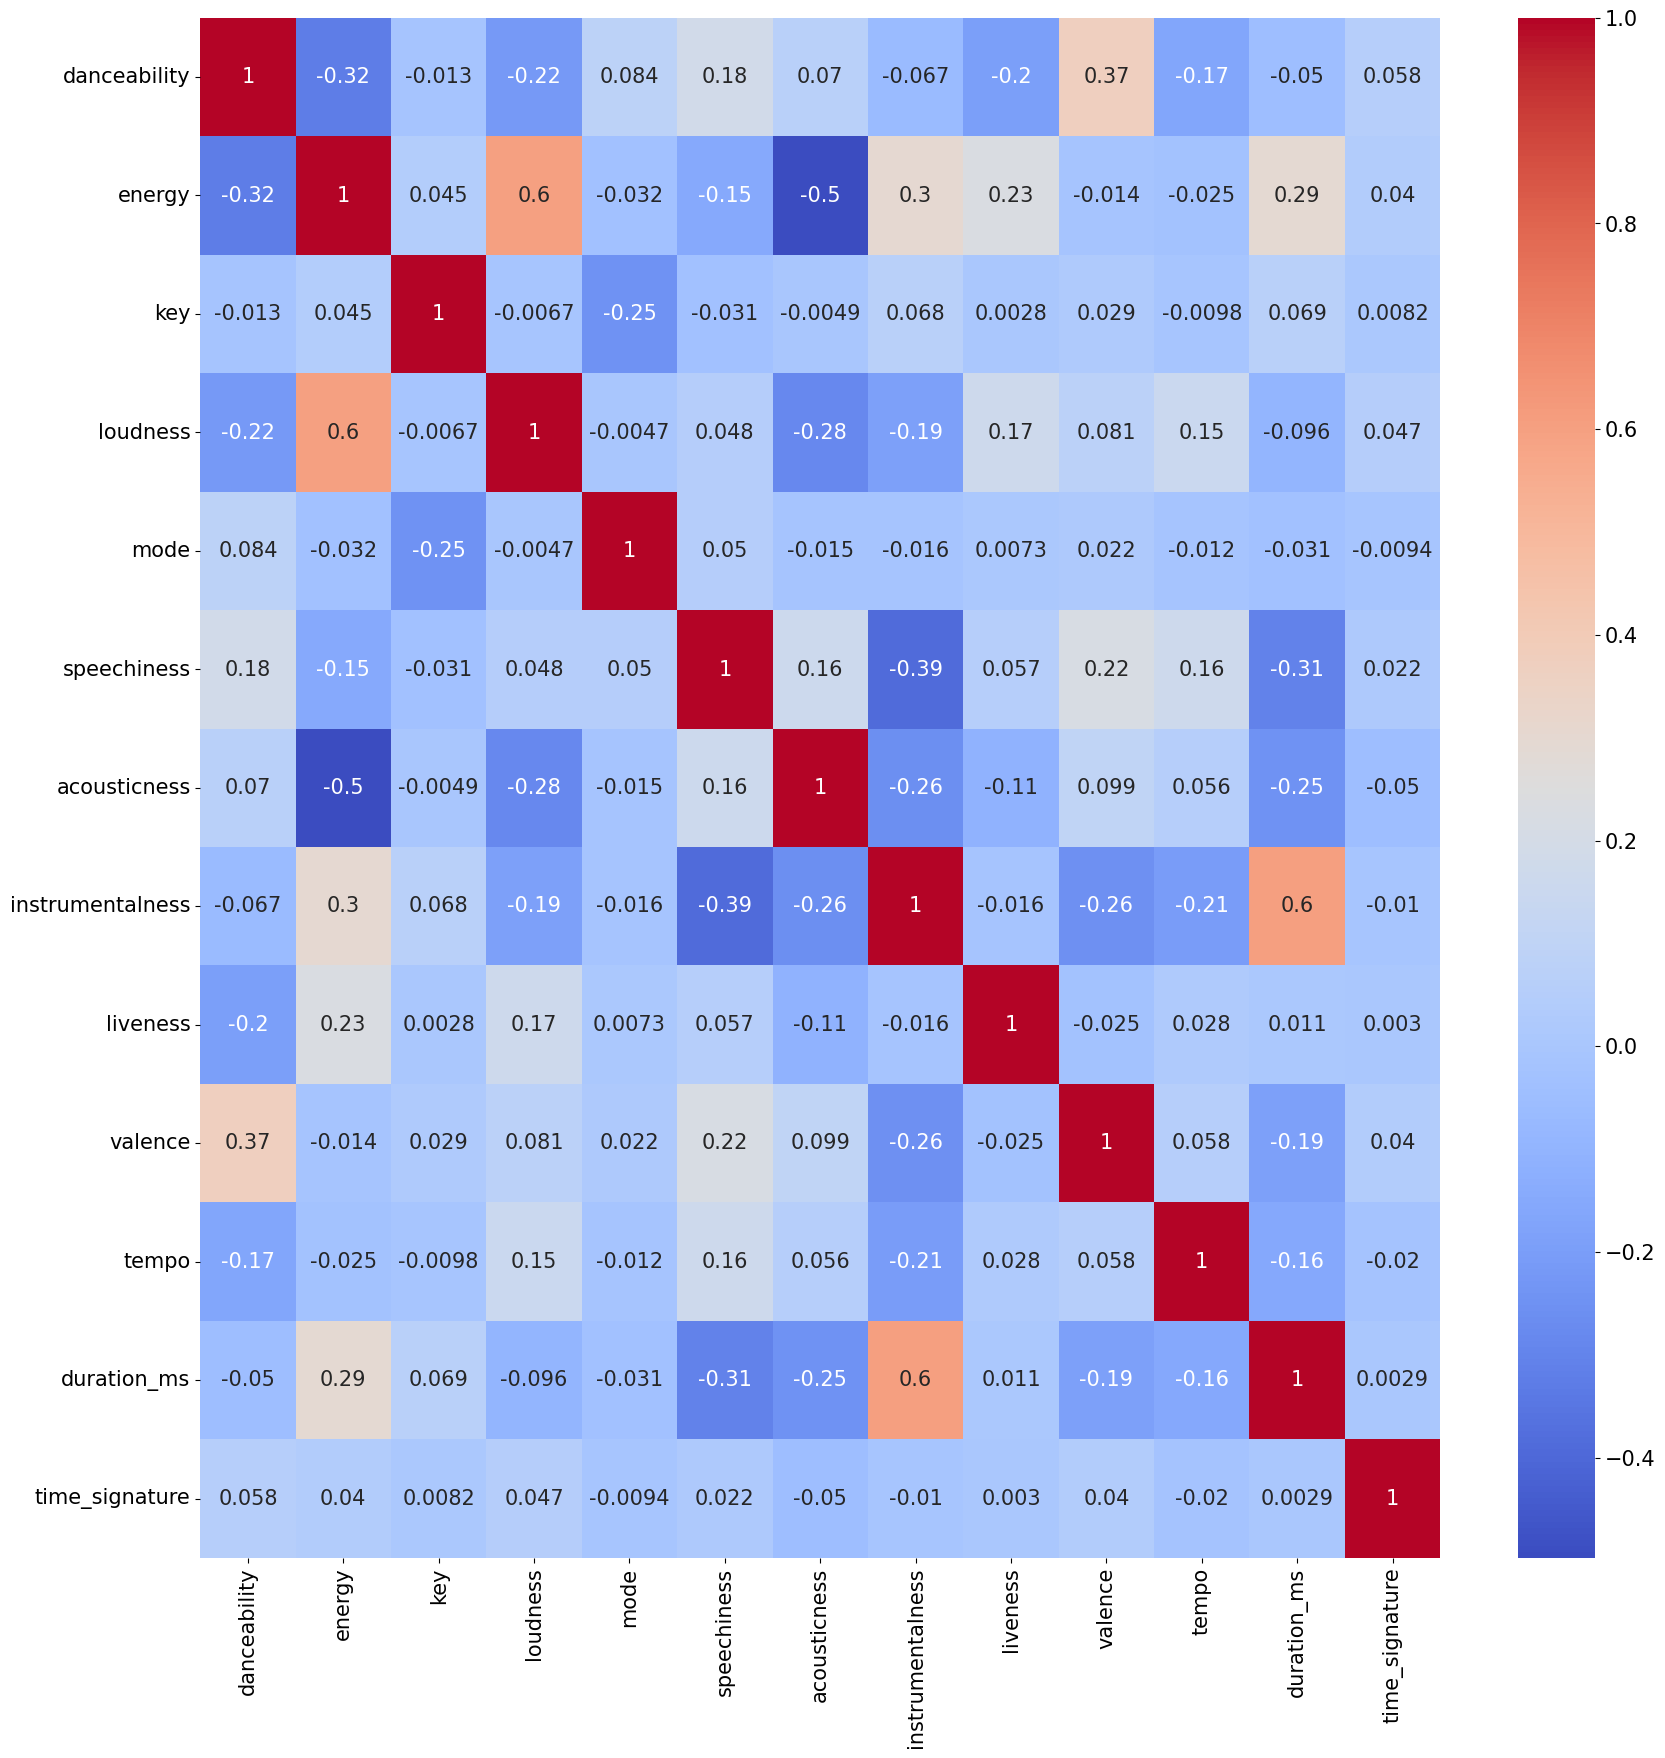

In [21]:
# Select only numeric columns for correlation matrix
numeric_columns = db.select_dtypes(include=[np.number])

# Plotting the correlation matrix
plt.figure(figsize=(20,20))
corr = numeric_columns.corr()  # Use only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


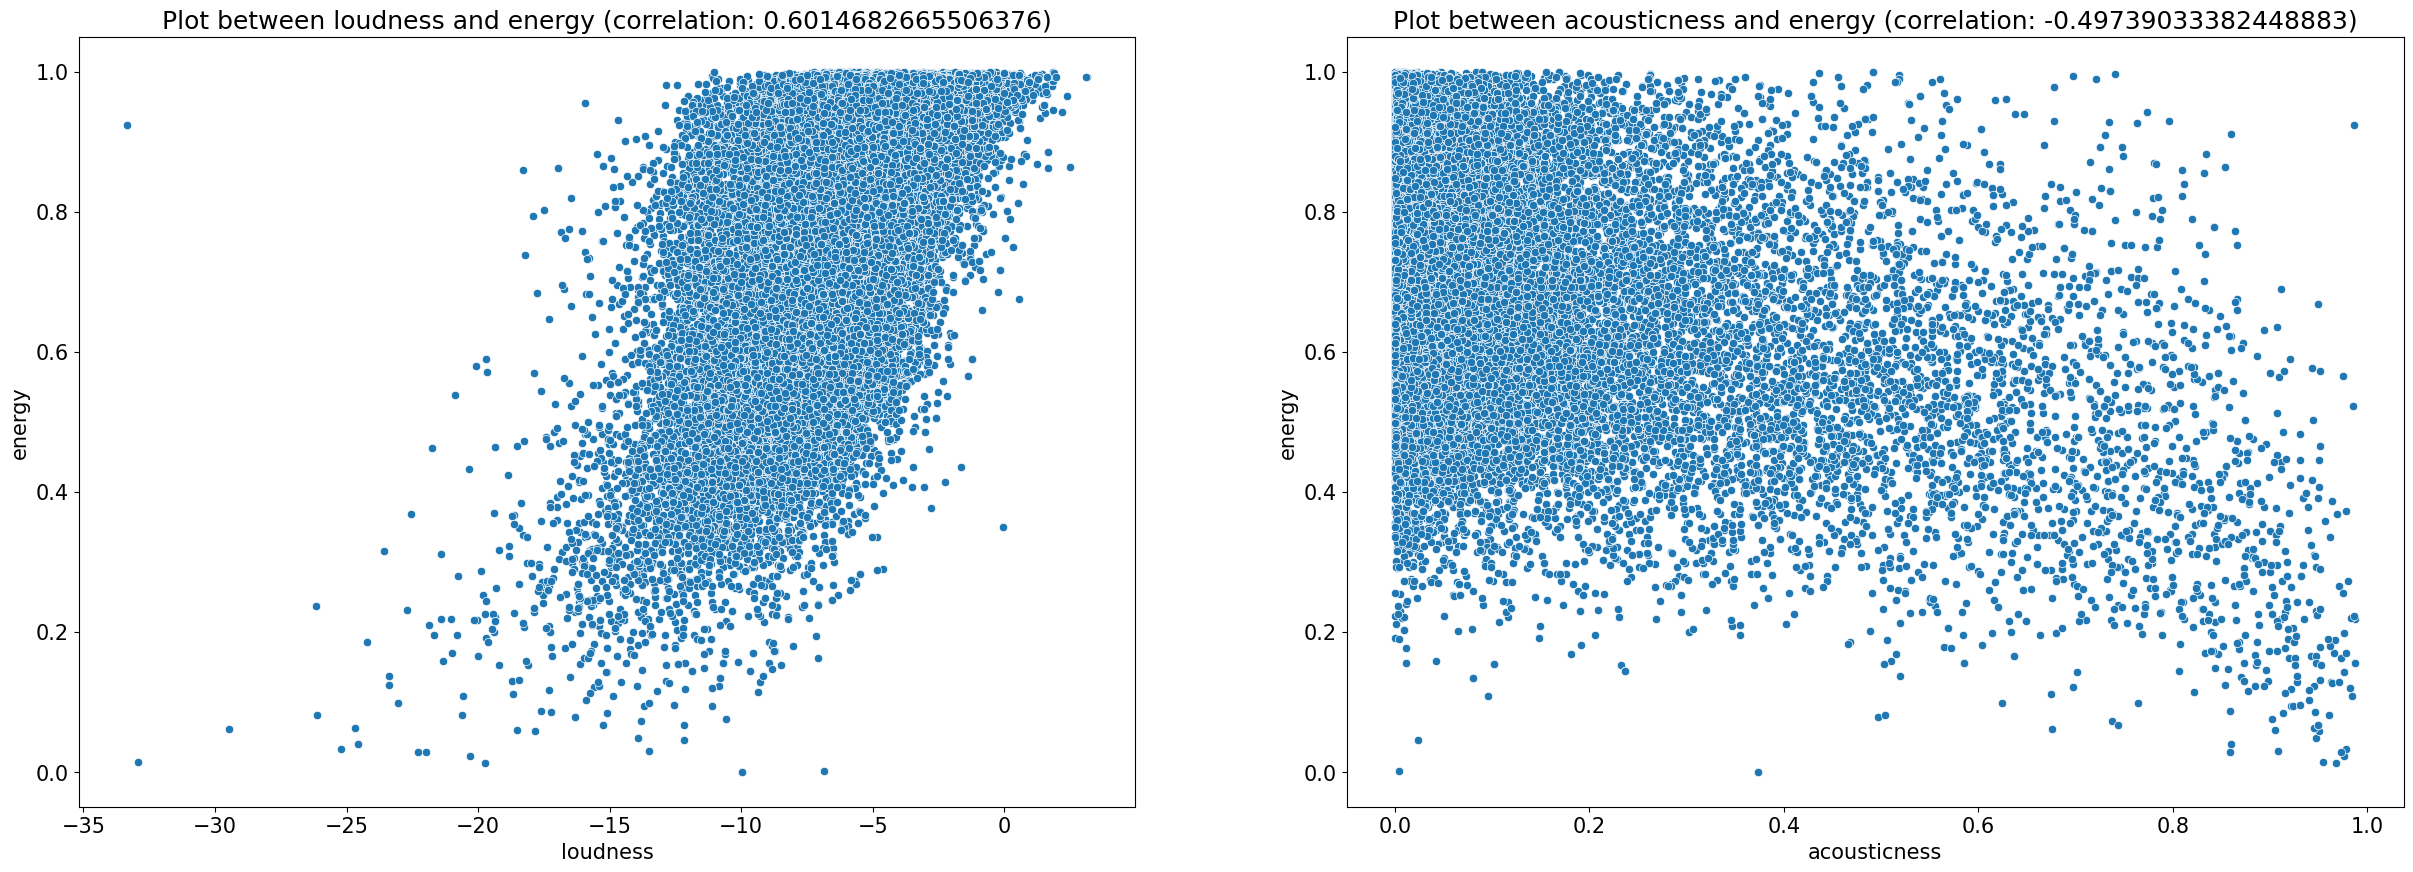

In [23]:
plt.figure(figsize=(30,10))

# Plot between parameters with maximum correlation
plt.subplot(121)
sns.scatterplot(x=db['loudness'], y=db['energy'])
plt.title(f"Plot between loudness and energy (correlation: {corr['loudness']['energy']})")

# Plot between parameters with minimum correlation
plt.subplot(122)
sns.scatterplot(x=db['acousticness'], y=db['energy'])
plt.title(f"Plot between acousticness and energy (correlation: {corr['acousticness']['energy']})")

plt.show()


In [24]:
scaler = StandardScaler()
features_to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms', 'time_signature']

# Scale the features
db[features_to_scale] = scaler.fit_transform(db[features_to_scale])

# Verify the scaling
db.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04,4.229900e+04
mean,-1.935141e-16,5.267883e-16,8.197472e-17,1.182586e-16,6.584854e-17,6.988009e-17,4.837852e-17,-4.837852e-17,-1.962018e-16,5.912930e-17,-6.961132e-16,1.088517e-16,-2.213149e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-3.666571e+00,-4.147213e+00,-1.464720e+00,-9.144046e+00,-1.104304e+00,-9.024381e-01,-5.628845e-01,-7.634171e-01,-1.158372e+00,-1.451122e+00,-3.753996e+00,-2.188032e+00,-1.107874e+01
25%,-7.365459e-01,-7.102122e-01,-1.191952e+00,-5.763670e-01,-1.104304e+00,-6.931746e-01,-5.527640e-01,-7.634171e-01,-6.520588e-01,-8.408948e-01,-7.357496e-01,-6.898243e-01,1.021192e-01
50%,4.241030e-02,2.200936e-01,1.718864e-01,7.852647e-02,9.055475e-01,-4.839111e-01,-4.668912e-01,-7.473703e-01,-4.504449e-01,-1.504766e-01,-1.048722e-01,-2.535604e-01,1.021192e-01
75%,8.085967e-01,8.729397e-01,9.901894e-01,6.637142e-01,9.055475e-01,4.474699e-01,6.344747e-02,1.183767e+00,4.551091e-01,7.071858e-01,5.863164e-01,4.881281e-01,1.021192e-01
max,2.226042e+00,1.291849e+00,1.535725e+00,3.268667e+00,9.055475e-01,6.416235e+00,5.220494e+00,1.903848e+00,4.407653e+00,2.705539e+00,3.054002e+00,6.431494e+00,3.829073e+00


In [25]:
n_clusters = 15
cluster_data = db.drop(['genre', 'song_name'], axis=1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300)
kmeans.fit(cluster_data)

# Add the cluster labels to the original dataframe
db['cluster'] = kmeans.labels_


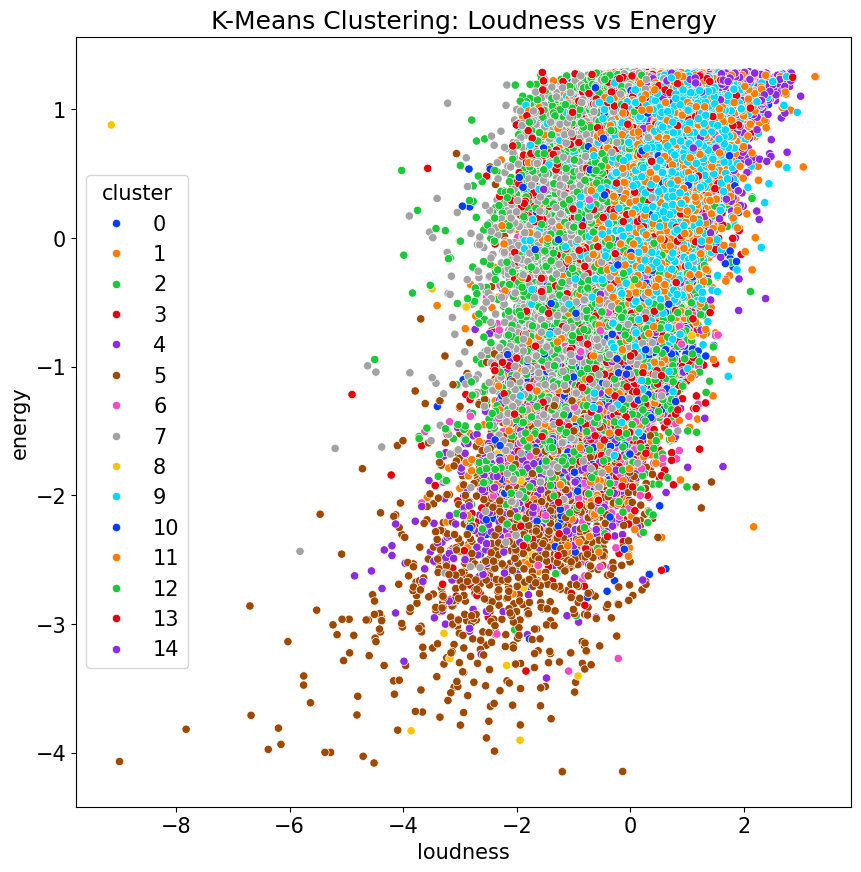

Counter({4: 2170,
         0: 2138,
         2: 3453,
         1: 4535,
         13: 2829,
         11: 2836,
         3: 2388,
         14: 2442,
         5: 1577,
         10: 2661,
         8: 150,
         6: 1620,
         9: 5268,
         7: 4333,
         12: 3899})

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=db['loudness'], y=db['energy'], hue=db['cluster'], palette='bright')
plt.title("K-Means Clustering: Loudness vs Energy")
plt.show()

# Check the distribution of songs across clusters
Counter(kmeans.labels_)


<ipython-input-27-7511eabd6fd0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most = cluster_genres[i].value_counts()[0]
<ipython-input-27-7511eabd6fd0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most = cluster_genres[i].value_counts()[0]
<ipython-input-27-7511eabd6fd0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most = cluster_genres[i].value_counts()[0]
<ipython-input-27-7511eabd6fd0>:12: FutureWarning: Series.__g

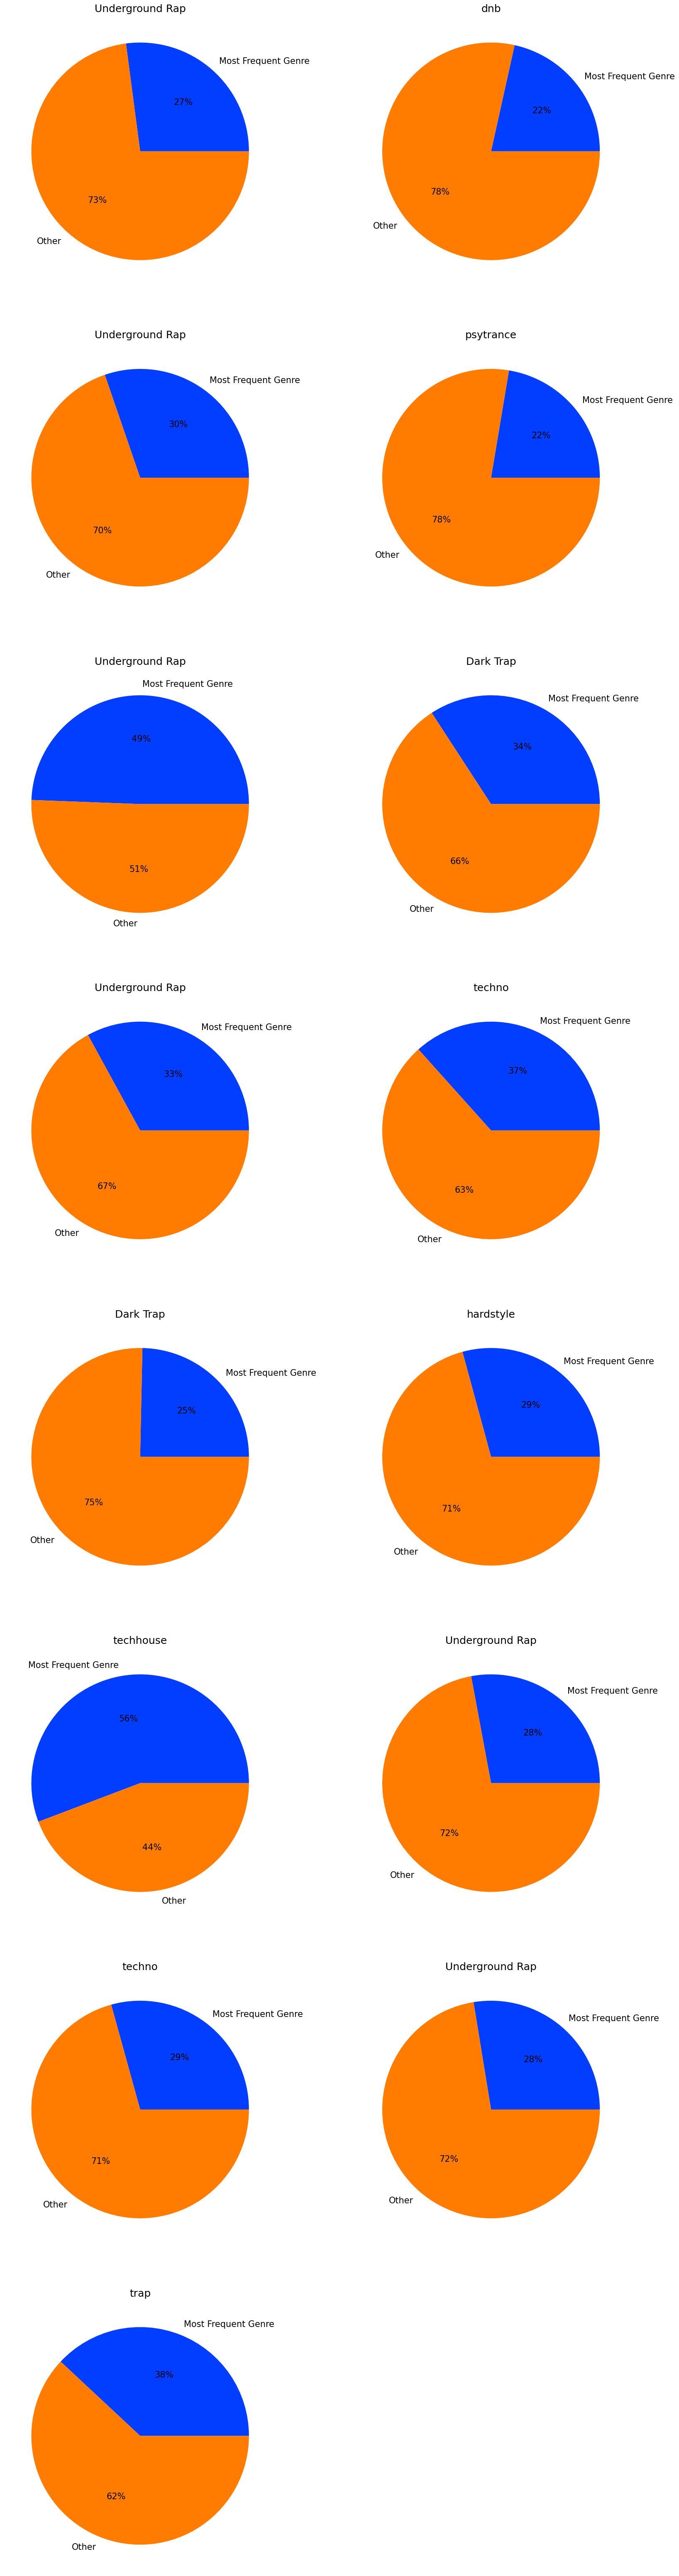

In [27]:
cluster_genres = {}
for i in set(kmeans.labels_):
    array = np.array(kmeans.labels_)
    indices = np.where(array == i)[0]
    cluster_genres[i] = pd.Series(list(db.iloc[list(indices)]['genre']))

# Pie charts to show most frequent genre per cluster
plt.figure(figsize=(20,80))
for i in range(len(cluster_genres)):
    plt.subplot(8, 2, i+1)
    keys = ['Most Frequent Genre', 'Other']
    most = cluster_genres[i].value_counts()[0]
    other = len(cluster_genres[i]) - most
    palette_color = sns.color_palette('bright')
    plt.pie([most, other], labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(cluster_genres[i].value_counts().index[0])
plt.show()
